In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pymc3 as pm

%matplotlib inline

In [2]:
model = pm.Model()
with model:
    mu1 = pm.Normal("mu1", mu=0, sigma=1, shape=10)
    trace = pm.sample(2000, tune=1000, init=None, cores=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu1]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:05<00:00, 1009.51draws/s]


In [8]:
with model:
    step = pm.NUTS()
    trace = pm.sample(2000, tune=1000, init=None, step=step, cores=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu1]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:09<00:00, 665.09draws/s] 


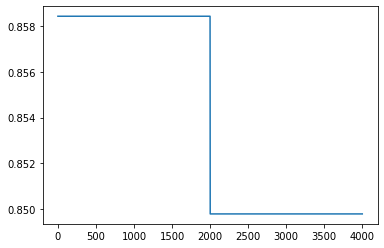

In [11]:
plt.plot(trace['step_size_bar'])

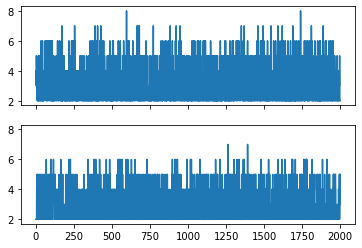

In [9]:
sizes1, sizes2 = trace.get_sampler_stats('depth', combine=False)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
ax1.plot(sizes1)
ax2.plot(sizes2)

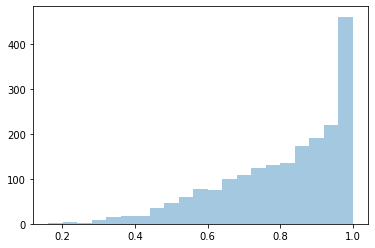

In [11]:
accept = trace.get_sampler_stats('mean_tree_accept', burn=1000)
sb.distplot(accept, kde=False)

In [12]:
model = pm.Model()
with model:
    mu1 = pm.Bernoulli("mu1", p=0.8)
    mu2 = pm.Normal("mu2", mu=0, sigma=1, shape=10)


In [14]:
with model:
    step1 = pm.BinaryMetropolis([mu1])
    step2 = pm.Metropolis([mu2])
    trace = pm.sample(10000, init=None, step=[step1, step2], cores=2, tune=1000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>BinaryMetropolis: [mu1]
>Metropolis: [mu2]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:04<00:00, 4544.95draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [15]:
trace.get_sampler_stats('accept')

array([[4.00000000e+00, 1.02027846e-01],
       [1.00000000e+00, 3.57634210e-03],
       [1.00000000e+00, 4.06835149e-02],
       ...,
       [1.00000000e+00, 2.29159352e-04],
       [1.00000000e+00, 4.91279655e+00],
       [2.50000000e-01, 1.17810022e-01]])